In [160]:

from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
import dtreeviz
from IPython.display import Image, display_svg, SVG
from sklearn.metrics import r2_score

In [161]:
df = pd.read_json('data/curated/all.ndjson', lines=True)
df = df.fillna(0)

In [162]:
df.columns

Index(['event', 'round', 'white', 'black', 'result', 'moves', 'white_elo',
       'black_elo', 'ECO', 'Opening', 'white_cpl', 'black_cpl',
       'stockfish_eval', 'queen_moved_at', 'total_checks', 'first_check_at',
       'queen_changed_at', 'total_moves', 'end_r', 'end_k', 'end_p', 'end_b',
       'end_n', 'end_q', 'end_N', 'end_P', 'end_Q', 'end_B', 'end_R', 'end_K',
       'promotion', 'can_claim_draw', 'insufficient_material', 'mean_elos',
       'diff_elos', 'white_mean', 'white_std', 'white_min', 'white_max',
       'black_mean', 'black_std', 'black_min', 'black_max', 'stockfish_mean',
       'stockfish_std', 'stockfish_min', 'stockfish_max'],
      dtype='object')

In [163]:
to_remove = ["moves", "white_elo", "black_elo", "white_cpl", "black_cpl", "diff_elos", "stockfish_eval", "white", "black", "event", "round"] # , "result", "ECO", "Opening"]

# Assuming 'target' is the name of the column you want to predict
features = df.drop(to_remove, axis=1)

In [164]:
len(features)

24965

In [165]:
df_train = features[:25000]
df_test = features[25000:]

In [166]:
dep_var = "mean_elos"

In [ ]:
# df[dep_var] = np.log(df[dep_var]) not sure if this is necessary will test

In [167]:
procs = [Categorify, FillMissing]

In [168]:
splits = RandomSplitter(valid_pct=0.2)(range_of(features))

In [170]:
cont,cat = cont_cat_split(features, 1, dep_var=dep_var)

In [171]:
to = TabularPandas(features, procs, cat, cont, y_names=dep_var, splits=splits)

In [172]:
len(to.train),len(to.valid)

(19972, 4993)

In [173]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [174]:
m = DecisionTreeRegressor()
m.fit(xs, y);

In [175]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)


def mae(pred, y): 
    absolute_errors = [abs(true - pred) for true, pred in zip(y, pred)]
    mae = sum(absolute_errors) / len(absolute_errors)
    return mae

def m_mae(m, xs, y_true):
    return mae(m.predict(xs), y)

def m_r2(m, xs, y_true):
    return r2_score(y_true, m.predict(xs))

In [176]:
print(m_rmse(m, valid_xs, valid_y))
print(m_mae(m, valid_xs, valid_y))
print(m_r2(m, valid_xs, valid_y))

351.614679
283.3514920889245
-1.0818012417726126


In [177]:
m.get_n_leaves(), len(xs)


(19835, 19972)

In [179]:
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y), m_r2(m, valid_xs, valid_y)

(216.56837, 266.61803, -0.19697284670221027)

In [180]:
m.get_n_leaves()

614

In [76]:
def rf(xs, y, n_estimators=40, max_samples=200_000,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [77]:
m = rf(xs, y, n_estimators=500, max_samples=15000)

c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated an

In [79]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y), m_mae(m, valid_xs, valid_y)

c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated an

(168.296657, 237.764831, 194.22028664112176)

In [80]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])


c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
c:\Users\j

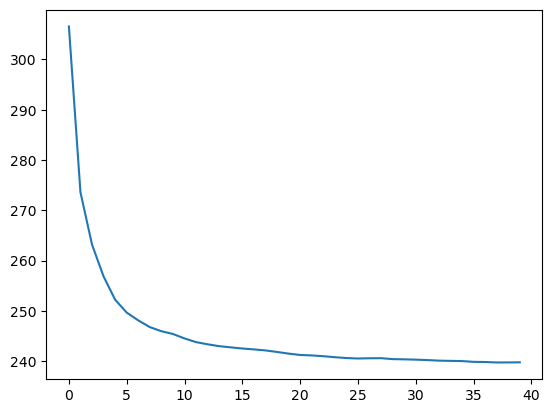

In [69]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);



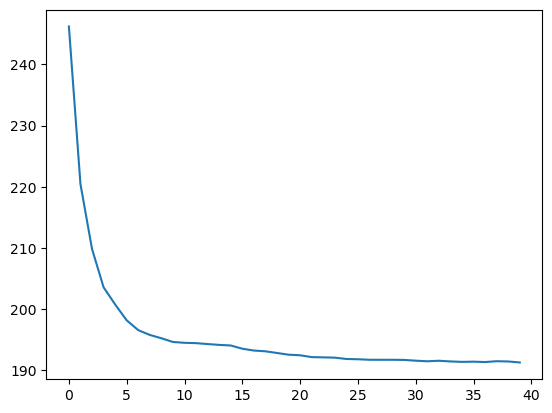

In [81]:
plt.plot([mae(preds[:i+1].mean(0), valid_y) for i in range(40)]);



In [82]:
r_mse(m.oob_prediction_, y)

244.541284

In [85]:
from sklearn.metrics import r2_score

In [89]:
N = [10, 25, 40, 100, 150, 200, 300, 500]

for n in N:
    m = rf(xs, y, n_estimators=n, max_samples=18000)
    print(f"For {n} estimators. rmse: {m_rmse(m, valid_xs, valid_y)}. mae: {m_mae(m, valid_xs, valid_y)}. r2: {r2_score(m.predict(valid_xs), valid_y)}")


c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated an

For 10 estimators. rmse: 245.685922. mae: 199.8405905518314. r2: -11.317786097735384


c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated an

For 25 estimators. rmse: 241.399106. mae: 196.98744974129772. r2: -21.197097823533166


c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated an

For 40 estimators. rmse: 240.016037. mae: 195.05414911397867. r2: -25.90492941222552


c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated an

For 100 estimators. rmse: 238.675869. mae: 195.44947907104435. r2: -36.5720936299519


c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated an

For 150 estimators. rmse: 238.192532. mae: 194.66240288449643. r2: -38.90334860551103


c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated an

For 200 estimators. rmse: 238.270085. mae: 194.47485716759692. r2: -39.73486627921838


c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated an

For 300 estimators. rmse: 238.1222. mae: 194.26651646894686. r2: -42.1698832673419


c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated an

For 500 estimators. rmse: 238.21298. mae: 194.60134246318378. r2: -43.463436548277706


c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated an

In [ ]:
m = rf(xs, y, n_estimators=25, max_samples=15000)

In [90]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])


c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
c:\Users\j

In [91]:
preds.shape


(500, 4993)

In [93]:

preds_std = preds.std(0)

In [94]:
preds_std[:5]

array([191.46079534, 201.73105566, 196.42086438, 189.47367861,
       226.2973791 ])

In [95]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [96]:

fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
23,white_mean,0.065435
27,black_mean,0.063608
32,stockfish_std,0.058771
31,stockfish_mean,0.054895
28,black_std,0.053417
24,white_std,0.053329
1,ECO,0.053096
34,stockfish_max,0.050802
26,white_max,0.050389
30,black_max,0.050173


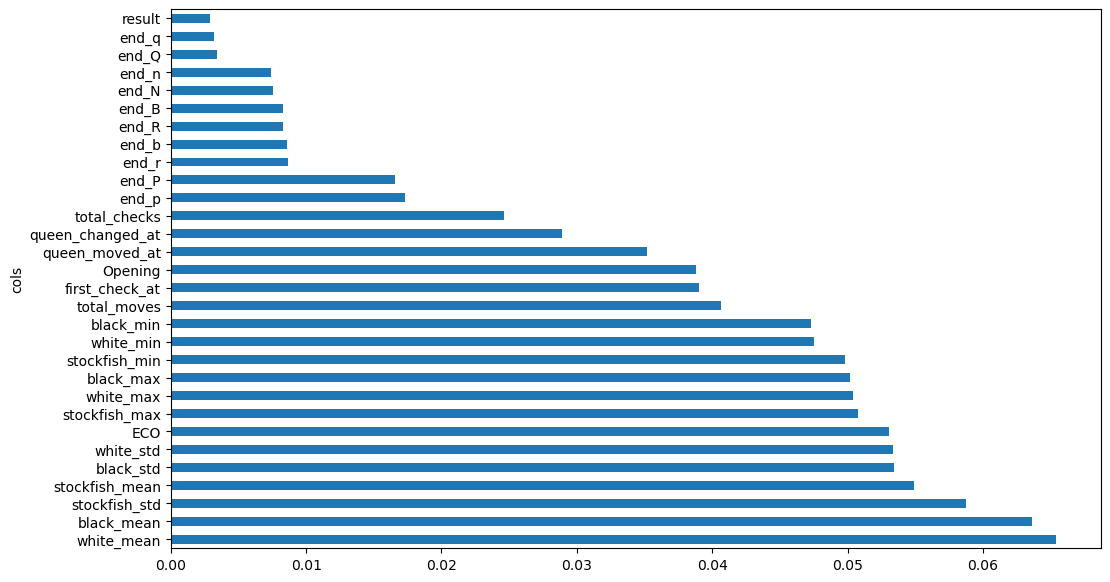

In [97]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [108]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

27

In [109]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [110]:

m = rf(xs_imp, y, max_samples=18000)

c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated an

In [111]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y), m_mae(m, xs_imp, y), m_mae(m, valid_xs_imp, valid_y)

c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated an

(161.316978, 239.249156, 125.49329430311911, 195.94178110721674)

In [112]:
len(xs.columns), len(xs_imp.columns)


(35, 27)

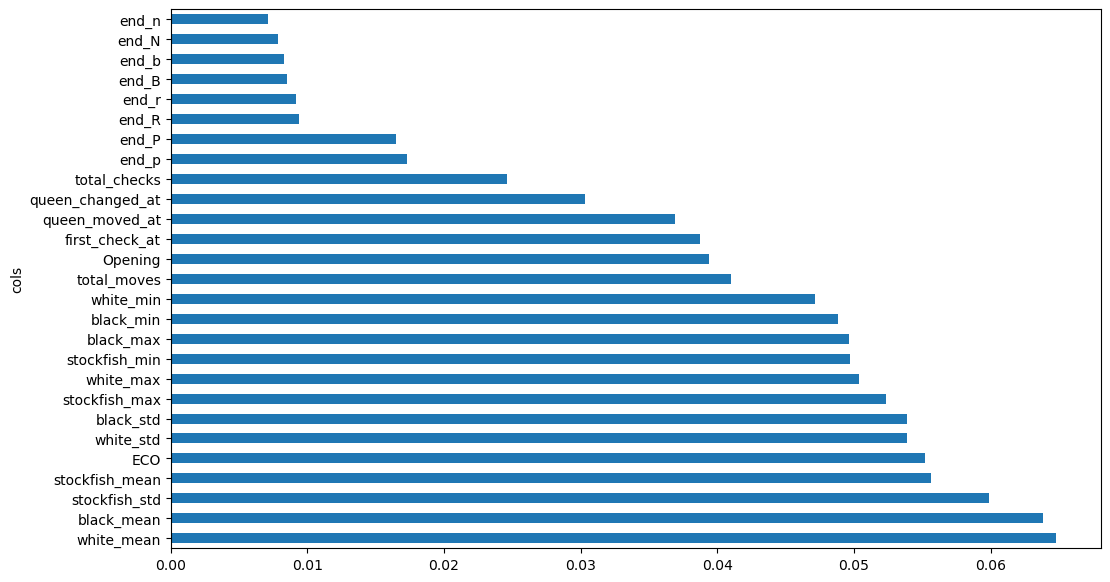

In [113]:

plot_fi(rf_feat_importance(m, xs_imp));

In [116]:
import fastbook
from fastbook import *

c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\fastbook\__init__.py:13: UserWarning: Missing `sentencepiece` - please run `pip install 'sentencepiece<0.1.90'`


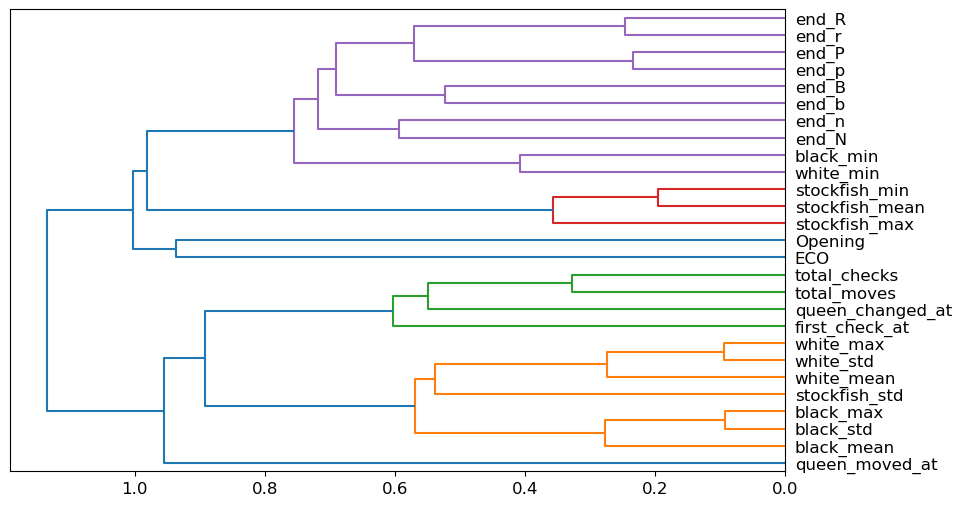

In [117]:

cluster_columns(xs_imp)

In [132]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=50, min_samples_leaf=15,
        max_samples=18000, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return m.oob_score_

In [133]:
get_oob(xs_imp)

c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated an

-0.03233443525777657

In [137]:

#hide
import warnings
warnings.simplefilter('ignore', FutureWarning)

from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

In [140]:
row = valid_xs_imp.iloc[:5]

In [141]:
prediction,bias,contributions = treeinterpreter.predict(m, row.values)

In [142]:
prediction[0], bias[0], contributions[0].sum()

(array([2236.69375692]), 2243.0228256944447, -6.329068770200383)

<Figure size 2000x600 with 0 Axes>

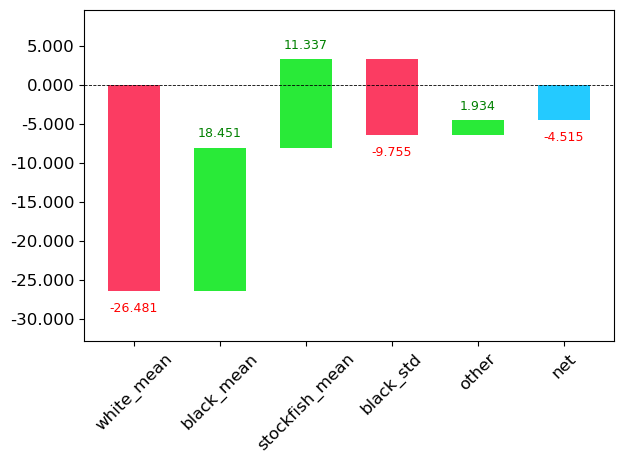

In [149]:
plt.figure(figsize=(20, 6))
waterfall(valid_xs_imp.columns[:5], contributions[0][:5], threshold=0.08, 
          rotation_value=45,formatting='{:,.3f}')
# Show the plot
plt.show()

In [150]:
m = rf(xs_imp, y, max_samples=18000)

In [152]:
m.predict(valid_xs_imp)
valid_y

21895    2123.0
1374     2214.5
17761    1680.5
2430     2168.5
15573    2606.0
          ...  
10163    2384.0
5878     2074.5
19498    2526.5
8766     1978.0
9008     1723.0
Name: mean_elos, Length: 4993, dtype: float32

In [156]:
np.mean(y)

2243.3704

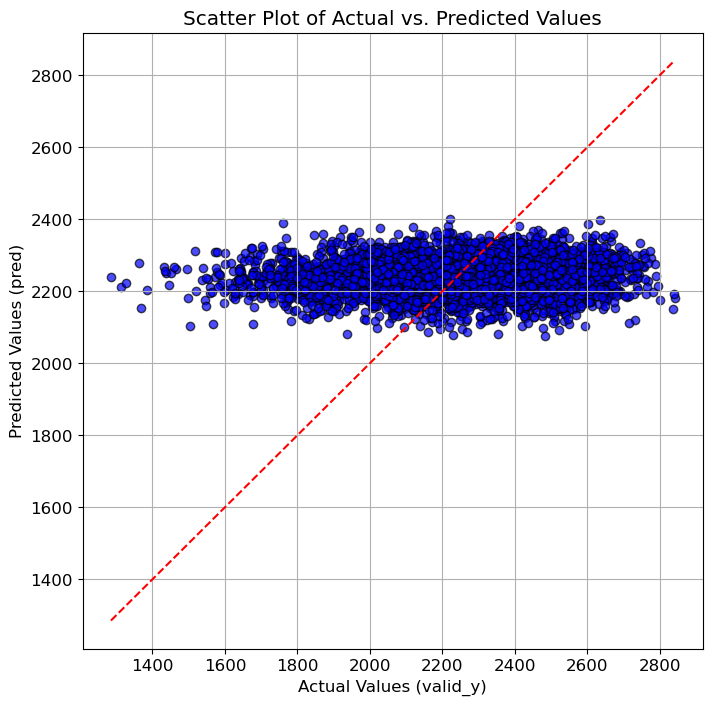

In [154]:
import matplotlib.pyplot as plt

# Assuming valid_y and pred are your actual and predicted values
# valid_y = [your actual values]
# pred = [your predicted values]

plt.figure(figsize=(8, 8))
plt.scatter(valid_y, m.predict(valid_xs_imp), edgecolor='k', color='b', alpha=0.7)

# Adding a diagonal line to indicate perfect predictions
plt.plot([min(valid_y), max(valid_y)], [min(valid_y), max(valid_y)], 'r--')

# Adding titles and labels
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.xlabel('Actual Values (valid_y)')
plt.ylabel('Predicted Values (pred)')

# Adding a grid for better readability
plt.grid(True)

# Show the plot
plt.show()
